In [252]:
from QuantLib import *

In [253]:
today = Date(19,August,2017)
Settings.instance().evaluationDate=today

In [254]:
option =EuropeanOption(PlainVanillaPayoff(Option.Call,100.0),EuropeanExercise(Date(24,September,2017)))

In [255]:
r= SimpleQuote(0.01)
sigma= SimpleQuote(0.2)
u=SimpleQuote(100)

In [256]:
rfCurve = FlatForward(0,TARGET(), QuoteHandle(r),Actual360())
vol = BlackConstantVol(0,TARGET(),QuoteHandle(sigma),Actual360())

In [257]:
process = BlackScholesProcess(QuoteHandle(u),YieldTermStructureHandle(rfCurve),BlackVolTermStructureHandle(vol) )

In [258]:
engine=AnalyticEuropeanEngine(process)

In [259]:
option.setPricingEngine(engine)

In [260]:
print('{0:.4f} {1:.4f} {2:.4f} {3:.4f} {4:.4f}'.format(option.NPV(),option.delta(), option.vega(),option.gamma(),option.theta()))

2.4980 0.5184 12.2472 0.0648 -13.4610


Market Changes

In [261]:
u.setValue(95)

In [262]:
print('{0:.4f} {1:.4f} {2:.4f} {3:.4f} {4:.4f}'.format(option.NPV(),option.delta(), option.vega(),option.gamma(),option.theta()))

0.6956 0.2152 8.5357 0.0501 -9.2353


In [263]:
%%capture
%pylab inline --no-import-all
import numpy
import matplotlib.pyplot as plot
from IPython.display import display

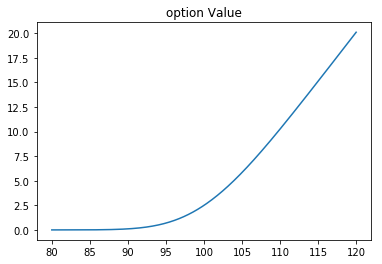

In [264]:
f, ax=plot.subplots()
xs= numpy.linspace(80.0,120.0,400)
ys=[]
for x in xs:
    u.setValue(x);
    ys.append(option.NPV())
ax.set_title("option Value")
_=ax.plot(xs,ys)

In [265]:
Settings.instance().evaluationDate=Date(14,September,2017)

In [266]:
print('{0:.4f} {1:.4f} {2:.4f} {3:.4f} {4:.4f}'.format(option.NPV(),option.delta(), option.vega(),option.gamma(),option.theta()))

20.0278 1.0000 0.0000 0.0000 -0.9997


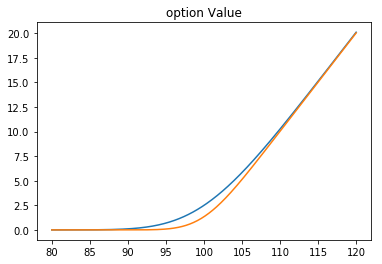

In [267]:
ys=[]
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.plot(xs,ys)
display(f)  # f=fig object 

Heston Model

In [268]:
# dummy starting params
v0=0.04; kappa=0.1;theta=0.01;sigma=0.05; rho=-0.75
model =HestonModel(
    HestonProcess(YieldTermStructureHandle(rfCurve), YieldTermStructureHandle(FlatForward(0,TARGET(),0.0,Actual360())),
                  QuoteHandle(u), v0,kappa,theta,sigma,rho))

In [269]:
engine=AnalyticHestonEngine(model)
option.setPricingEngine(engine)

In [270]:
print(option.NPV())

20.027773968568795


Monte-Carlo Engine

In [271]:
engineMC=MCEuropeanEngine(process,"PseudoRandom", timeSteps=20, requiredSamples=250000)
option.setPricingEngine(engineMC)

In [272]:
Settings.instance().evaluationDate=today

In [277]:
print('{0:.4f} '.format(option.NPV())) # MC cannot est greek, must use Fininte Difference

20.0822 
